52, 76, 57, 77, 60, 60, 60, 65, 56, 60
623


n = 10
x = tensor([0.0840, 0.1220, 0.0920, 0.1240, 0.0960, 0.0960, 0.0960, 0.1040, 0.0900,
        0.0960])
L = tensor([17, 24, 18, 25, 19, 19, 19, 21, 18, 19])
69, 100, 75, 102, 79, 79, 79, 86, 74, 79
822


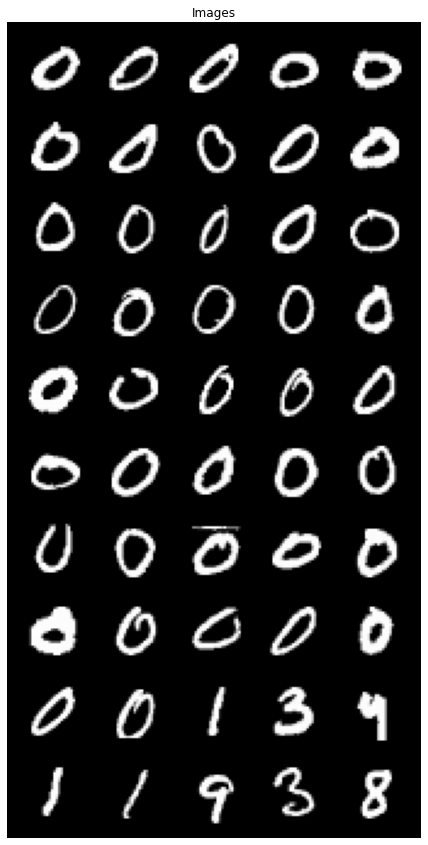

In [1]:
import vae
from utils.data.split_datasets import load_splitted_datasets
from vae.generation import augmentations
from vae.generation2 import DataAugmentation
from vae.models import VAEConfig
from vae.visualization import visualize_images
from torch.utils.data import DataLoader

DATASET = "MNIST"
vae.models.base.model_store = "pretrained_models/MNIST"
VAE_CONFIG = VAEConfig(z_dim=10, beta=1.0)
VAE_EPOCHS = 50
MULTI_VAE = False
SEED = 1337
K = 200

datasets, dataset_info = load_splitted_datasets(DATASET)

da = DataAugmentation(
    vae_config=VAE_CONFIG,
    vae_epochs=VAE_EPOCHS,
    multi_vae=MULTI_VAE,
    seed=SEED,
)

print(", ".join([str(len(ds)) for ds in datasets]))
print(sum([len(ds) for ds in datasets]))

augmented_datasets = da.augment_datasets(datasets, dataset_info, augmentations.REPARAMETRIZATION, K=K, balancing=False)

print(", ".join([str(len(ds)) for ds in augmented_datasets]))
print(sum([len(ds) for ds in augmented_datasets]))

images = next(iter(DataLoader(augmented_datasets[0], batch_size=50, shuffle=True)))[0]
visualize_images(images, n=50, cols=5)